## Install and load the necessary packages and libraries

In [1]:
import os
import calendar
from pathlib import Path # to interact with file system.
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # for linear regression model.
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math


import networkx as nx
import statsmodels.formula.api as sm

from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import gainsChart, liftChart
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
pd.set_option('display.max_columns', 100)

### Loading the data

In [3]:
df_Telco = pd.read_csv('Telco-Customer-Churn.csv', header = 0) #, encoding = "ISO-8859-1")

df_Telco.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_Telco.shape #shape of Telco dataset

(7043, 21)

In [5]:
df_Telco.dtypes #showing dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Datapreprocessing

In [6]:
df_Telco['TotalCharges']=df_Telco['TotalCharges'].str.strip()
df_Telco['TotalCharges']=df_Telco['TotalCharges'].replace('',np.nan)
df_Telco['TotalCharges']=df_Telco['TotalCharges'].astype(float)


In [7]:
df_Telco['SeniorCitizen']=df_Telco['SeniorCitizen'].astype('category')

In [8]:
pd.DataFrame(df_Telco).isna().sum() #null values in data

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#substituting mean Totalcharges in 11 null Total Charges values
df_Telco['TotalCharges']=df_Telco['TotalCharges'].fillna(df_Telco['TotalCharges'].mean())

#### Converting outcome variables as 0 and 1

In [10]:
df_Telco['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_Telco['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_Telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Summary of Data 

In [11]:
num=['TotalCharges','MonthlyCharges','tenure']
df_num=df_Telco[num]
df_num.describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2283.300441,64.761692,32.371149
std,2265.000258,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1400.550000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


1. Average tenure of a customer is around 32 months
2. Average monthly charge paid by a customer is USD 65
3. Average total charge paid by a customer is around  USD 2283

### Heatmap showing correlation among numerical variables

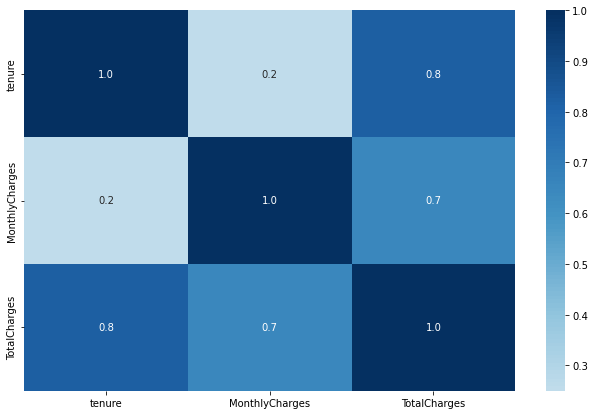

In [12]:
num=['tenure','MonthlyCharges','TotalCharges']
df_num=df_Telco[num]

corr = round(df_num.corr(),2)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()


1. High positive correlation between Total charges and Tenure which means that increase in Tenure may increase Total charges and vice versa.
2. High positive correlation between Monthly charges and Total Charges which means Increase in Monthly charges may increase Total charge of a customer and vice versa.

### Scatter maxtrix to show the relationship between numerical variables

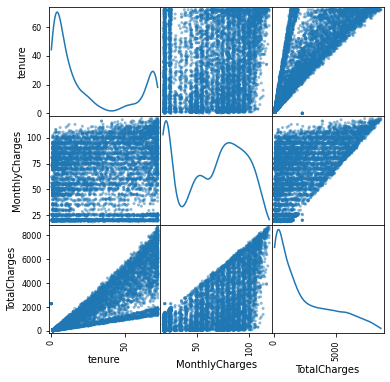

In [13]:
_ = scatter_matrix(df_num, figsize=(6, 6), diagonal='kde')

Again from  the scatterplot, we can see higher the monthly charges, higher is the total charges.
Also,higher the tenure, higher is the total charges

#### Percentage of Customer Churn

<AxesSubplot:title={'center':'Churn customers'}>

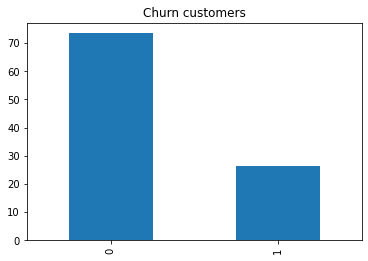

In [14]:
ax=(df_Telco['Churn'].value_counts()*100.0 /len(df_Telco))
ax.plot.bar(title = 'Churn customers')


Around 73 % of the customers are not churned whereas around 27% customer churns.

In order to understand the data we would do data exploration
## Demographic data

We will explore the demographic data first like gender, age(senior citizen or not), partner and dependent status of the customers

<AxesSubplot:title={'center':'Gender distribution of customers using Telco'}>

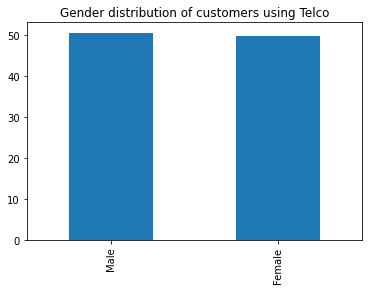

In [15]:
ax=(df_Telco['gender'].value_counts()*100.0 /len(df_Telco))
ax.plot.bar(title = 'Gender distribution of customers using Telco')

Almost, equal percentage of male and female are Telco's customer

#### We will be now look at the churn percentage for both genders  

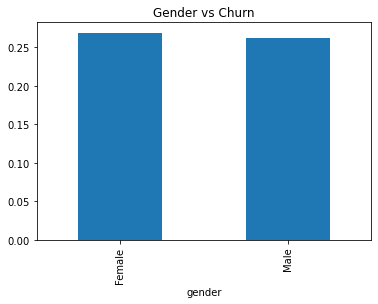

In [16]:
df_Telco.groupby('gender').mean()['Churn'].plot.bar(title = 'Gender vs Churn')
plt.show()

Almost equal percentage of churn in both male and female

#### Partner and Dependent

<AxesSubplot:title={'center':'Partner distribution of customers using Telco'}>

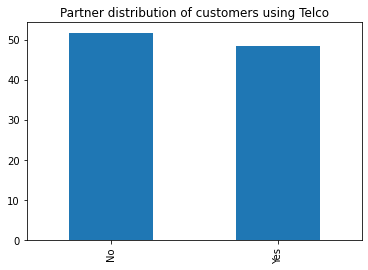

In [17]:
ax=(df_Telco['Partner'].value_counts()*100.0 /len(df_Telco))
ax.plot.bar(title = 'Partner distribution of customers using Telco')

Almost equal number of customers with/without a partner

<AxesSubplot:title={'center':'Dependent distribution of customers using Telco'}>

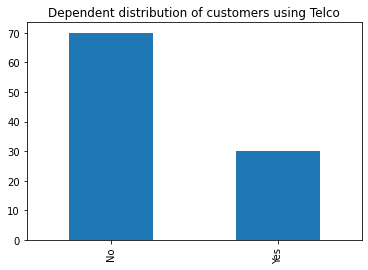

In [18]:
ax=(df_Telco['Dependents'].value_counts()*100.0 /len(df_Telco))
ax.plot.bar(title = 'Dependent distribution of customers using Telco')

Majority of customers dont have a dependent (~70%)

#### Now we will look at the Churn percentage for the Customers for both Partner and dependent

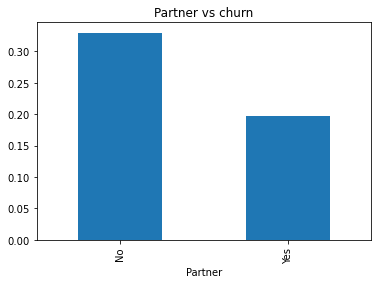

In [19]:
df_Telco.groupby('Partner').mean()['Churn'].plot.bar(title = 'Partner vs churn')
plt.show()

Percentage of a churn is more for a customer who donot have a partner

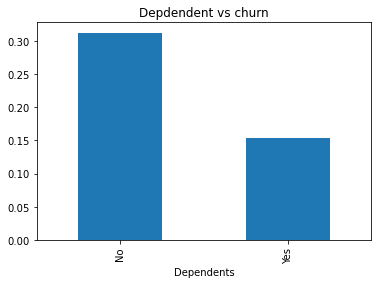

In [20]:
df_Telco.groupby('Dependents').mean()['Churn'].plot.bar(title = 'Depdendent vs churn')
plt.show()

Percentage of churn is more for customers who donot have a dependent

#### Senior Citizen distribution

<AxesSubplot:title={'center':'SeniorCitizen distribution of customers using Telco'}>

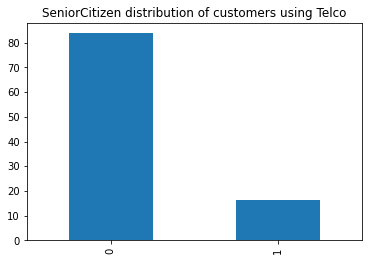

In [21]:
ax=(df_Telco['SeniorCitizen'].value_counts()*100.0 /len(df_Telco))
ax.plot.bar(title = 'SeniorCitizen distribution of customers using Telco')


Around only 16 % of the Telco customers are Senior Citizen

#### Churn percentage in Senior Citizen

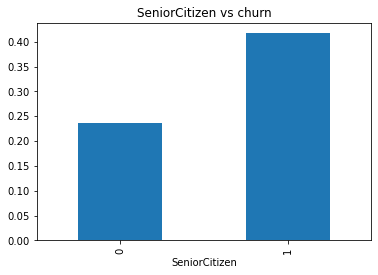

In [22]:
df_Telco.groupby('SeniorCitizen').mean()['Churn'].plot.bar(title = 'SeniorCitizen vs churn')
plt.show()

Percentage of churn is more for senior citizen customers

## Services data
Exploration of different Telco Services used by Customers

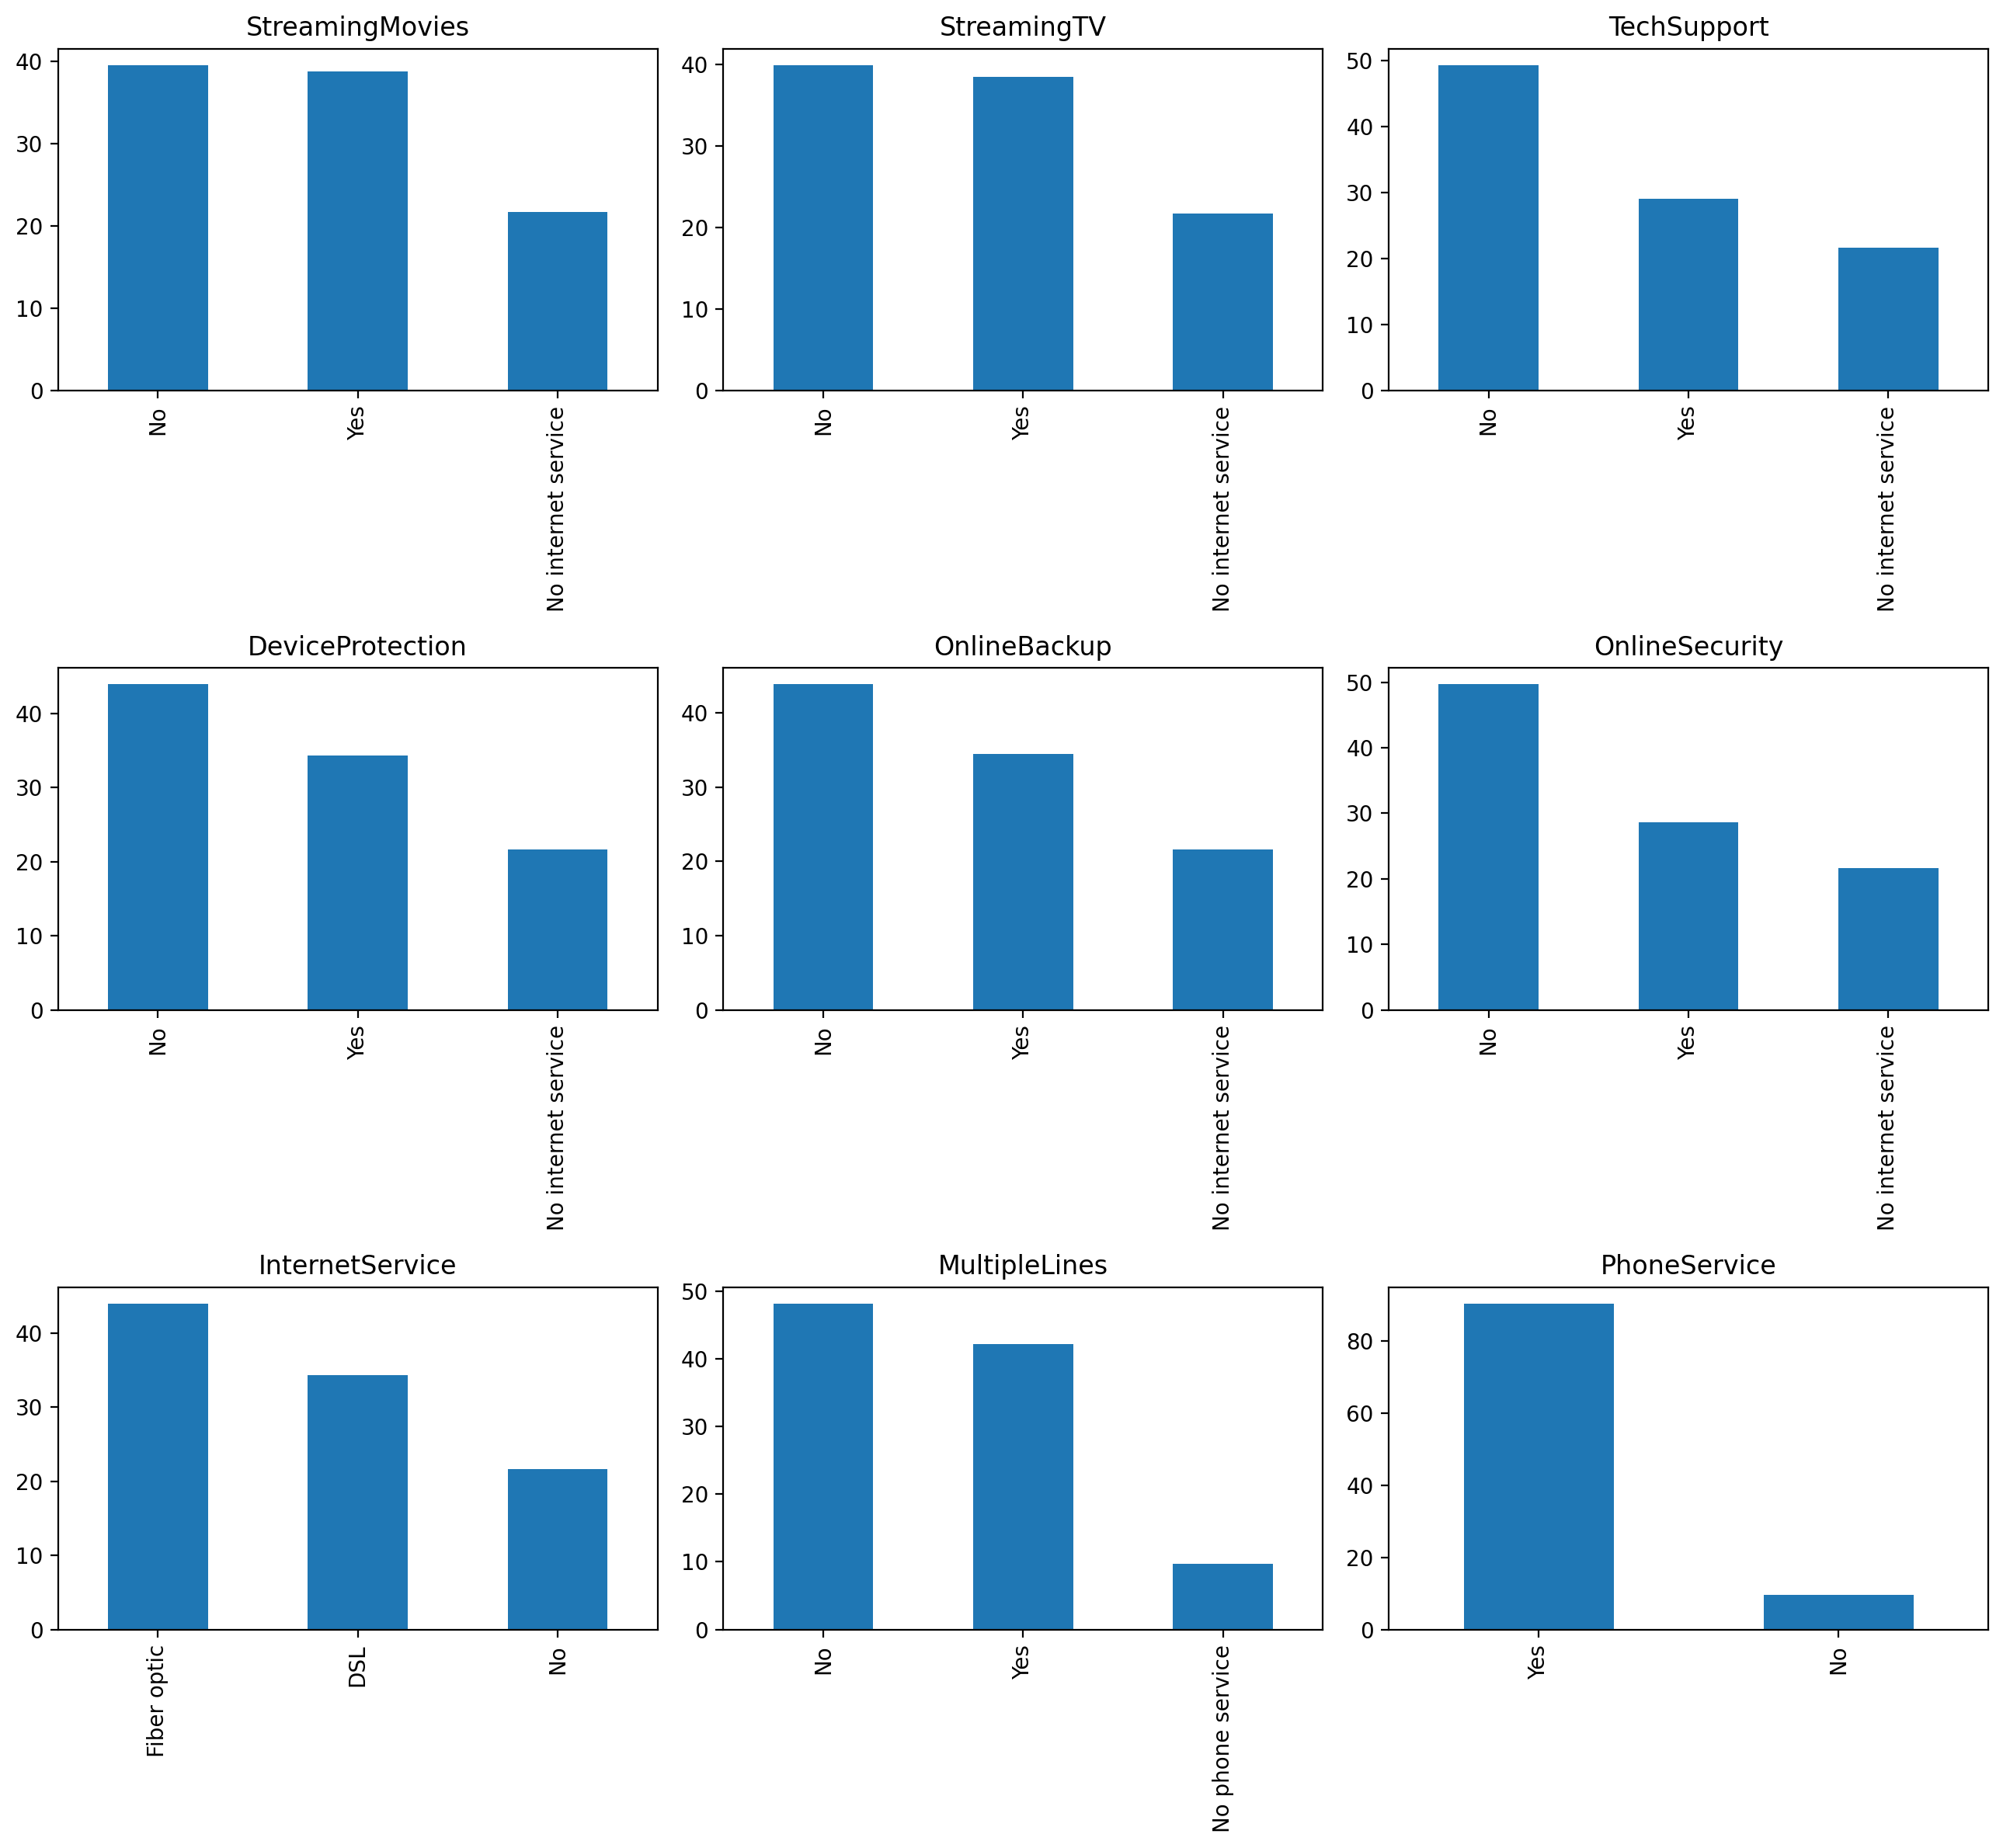

In [23]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (13, 12), dpi=200)

for r in range(0, 3):
    for c in range(0, 3):
        service = services.pop()
        bar_data = (df_Telco[service].value_counts()*100.0 /len(df_Telco))
        bar_data.plot.bar(title = '{}'.format(service), ax=axes[r, c])

fig.tight_layout()
plt.show()

1. Most of the Telco customers use Phone service. Out of all the customers who have opted for a phone service, there is almost an equal split between the customers who have opted for a mutiple line vs people who haven’t.
2. Customers are majorly using Fiber Optic Internet Service followed by DSL.  Almost ~78% customer havent opted for Internet Service. After opting for internet service, most of the customers are not signed up for service that comes with it like Online Security/Backup, Device protection and Tech support. 
Out of all the customers who have signed up for Internet service, there is almost equal percentage of customers who have/have not signed up for Sreaming TV/movies.

## Customer Account Information Data

Exploration of variables such as Tenure, Monthly charge,total charge,Contract,PaperlessBilling,PaymentMethod 

<AxesSubplot:title={'center':'MonthlyCharges vs churn'}, xlabel='Churn'>

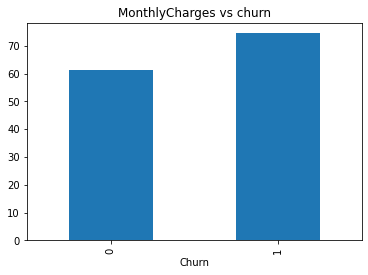

In [24]:
df_Telco.groupby("Churn")["MonthlyCharges"].mean().plot.bar(title = 'MonthlyCharges vs churn')

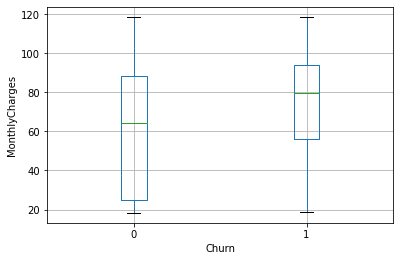

In [25]:
ax = df_Telco.boxplot(column='MonthlyCharges', by='Churn')
ax.set_ylabel('MonthlyCharges')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

<AxesSubplot:title={'center':'TotalCharges vs churn'}, xlabel='Churn'>

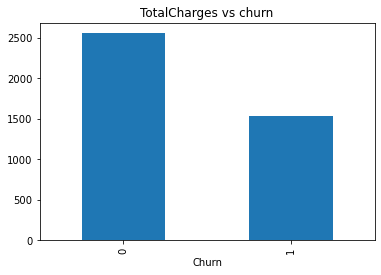

In [26]:
df_Telco.groupby("Churn")["TotalCharges"].mean().plot.bar(title = 'TotalCharges vs churn')

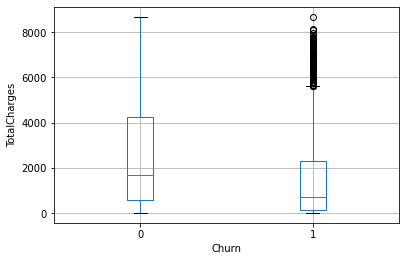

In [27]:
ax = df_Telco.boxplot(column='TotalCharges', by='Churn')
ax.set_ylabel('TotalCharges')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

From the boxplot we can see that Total charges for churned customer has some outliers. This can mean that there are some customer who paid high total charges and got churned.

<AxesSubplot:title={'center':'Contract vs churn'}, xlabel='Contract'>

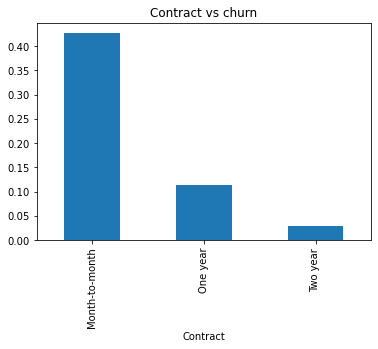

In [28]:
df_Telco.groupby("Contract")["Churn"].mean().plot.bar(title = 'Contract vs churn')

Month-to-month contract plan has the highest customer churn rate and two year plan has the highest retention

<AxesSubplot:title={'center':'Paperless Billing vs churn'}, xlabel='PaperlessBilling'>

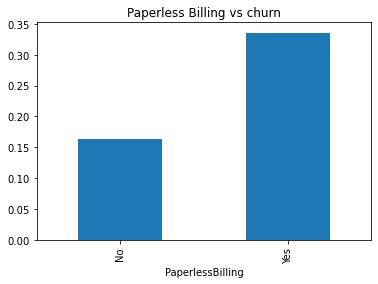

In [29]:
df_Telco.groupby("PaperlessBilling")["Churn"].mean().plot.bar(title = 'Paperless Billing vs churn')

Customers who are using paperless billing are churning more than those not using paperless billing

<AxesSubplot:title={'center':'PaymentMethod vs churn'}, xlabel='PaymentMethod'>

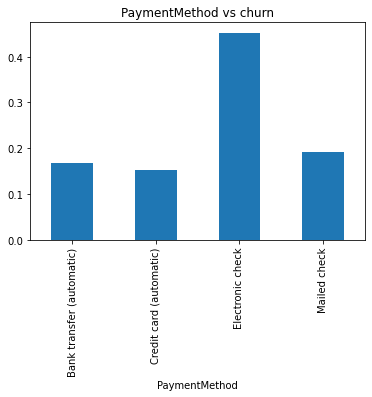

In [30]:
df_Telco.groupby("PaymentMethod")["Churn"].mean().plot.bar(title = 'PaymentMethod vs churn')

Customers using Electronic check as payment method has higher churn rate

# Methods 

### KNN

In [31]:
choose_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [32]:

df_clean =df_Telco[choose_columns]
df_clean['SeniorCitizen']=df_clean['SeniorCitizen'].astype('int64')
df_clean['Churn']=df_clean['Churn'].astype('category')

In [33]:
#defining y and X
y = df_clean['Churn']
X = pd.get_dummies(df_clean.drop(columns=['Churn']), drop_first=False)

In [34]:
#splitting the data into two sets
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.4, random_state=1)

train_X = train_X.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
valid_X = valid_X.reset_index(drop=True)
valid_y = valid_y.reset_index(drop=True)

print(train_X.shape)
print(valid_X.shape)

(4225, 45)
(2818, 45)


In [35]:
# Since we dont need to create dummmy for 0/1 variables for KNN 
#so passing such variables in a list named list_1_0var
list_1_0var=['SeniorCitizen']

In [36]:
#here, creating list of numerical and categorical variables for further use in KNN
#Also, created z columns to use it in StandardScalar code

list_num=[]
list_dummies=[]

for col in train_X.columns:
    if col in list_1_0var:
        continue
    var=type(train_X[col][0])
    if  var==np.float64 or var==np.int64:
        list_num.append(col)
    elif var==np.uint8:
        list_dummies.append(col)
        

a=train_X[list_num].add_prefix('z')
z_columns=a.columns
z_columns

Index(['ztenure', 'zMonthlyCharges', 'zTotalCharges'], dtype='object')

In [37]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_X[list_num])

StandardScaler()

In [38]:
scalar_train_X = pd.DataFrame(
    scaler.transform(train_X[list_num]), columns=z_columns
) #transforming the training data and resetting index too


train_X = pd.concat([scalar_train_X, train_X[list_dummies],train_X[list_1_0var]], axis=1)
train_X.head()

,ztenure,zMonthlyCharges,zTotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
0,1.620927,0.772324,1.868986,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0
1,1.620927,0.705838,1.776058,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0
2,0.726097,-1.494873,-0.585794,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0
3,-1.266933,-0.160152,-0.974452,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,-0.697495,0.887014,-0.384577,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1


In [39]:
scalar_valid_X = pd.DataFrame(
    scaler.transform(valid_X[list_num]), columns=z_columns
) #transforming the training data and

valid_X = pd.concat(
    [scalar_valid_X, valid_X[list_dummies],valid_X[list_1_0var]], axis=1
)
valid_X.head()

,ztenure,zMonthlyCharges,zTotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
0,0.360031,0.499729,0.460624,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0
1,1.376882,1.249366,1.847443,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1
2,-0.819518,-0.658802,-0.770088,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
3,-1.104236,-0.472639,-0.890854,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,-0.900866,0.035984,-0.710366,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [40]:
knn = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y) #initially k=11
#Try using knn for valid dataset
distances, indices = knn.kneighbors(valid_X)
accuracy_score(valid_y, knn.predict(valid_X))

0.751596877217885

In [41]:
# Train a classifier for different values of k and different metrics
results = []
metrics=['manhattan', 'minkowski']
for k in range(1, 20):
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k,metric=metric).fit(train_X, train_y)
        results.append({
            'k': k,
            'accuracy': np.round(accuracy_score(valid_y, knn.predict(valid_X)),2),
            'metric': metric
        })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy     metric
0    1      0.72  manhattan
1    1      0.72  minkowski
2    2      0.76  manhattan
3    2      0.76  minkowski
4    3      0.75  manhattan
5    3      0.75  minkowski
6    4      0.78  manhattan
7    4      0.77  minkowski
8    5      0.77  manhattan
9    5      0.77  minkowski
10   6      0.78  manhattan
11   6      0.78  minkowski
12   7      0.78  manhattan
13   7      0.78  minkowski
14   8      0.78  manhattan
15   8      0.78  minkowski
16   9      0.78  manhattan
17   9      0.78  minkowski
18  10      0.79  manhattan
19  10      0.79  minkowski
20  11      0.78  manhattan
21  11      0.78  minkowski
22  12      0.79  manhattan
23  12      0.79  minkowski
24  13      0.79  manhattan
25  13      0.79  minkowski
26  14      0.79  manhattan
27  14      0.79  minkowski
28  15      0.79  manhattan
29  15      0.79  minkowski
30  16      0.79  manhattan
31  16      0.80  minkowski
32  17      0.79  manhattan
33  17      0.79  minkowski
34  18      0.79  ma

In [42]:
#best combination : k=13 
knn = KNeighborsClassifier(n_neighbors=13, metric='minkowski').fit(train_X, train_y)
#Try using knn for valid dataset
distances, indices = knn.kneighbors(valid_X)
np.round(accuracy_score(valid_y, knn.predict(valid_X)),2)

0.79

In [43]:
classificationSummary(valid_y, knn.predict(valid_X)) #accuracy

Confusion Matrix (Accuracy 0.7881)

       Prediction
Actual    0    1
     0 1815  283
     1  314  406


Prediction on new data

### Classification Trees

In [44]:
choose_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


df_clean =df_Telco[choose_columns]
df_clean['SeniorCitizen']=df_clean['SeniorCitizen'].astype('int64')
df_clean['Churn']=df_clean['Churn'].astype('category')

In [45]:
#splitting the data into two sets
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.4, random_state=1)

train_X = train_X.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
valid_X = valid_X.reset_index(drop=True)
valid_y = valid_y.reset_index(drop=True)

print(train_X.shape)
print(valid_X.shape)

(4225, 45)
(2818, 45)


In [46]:
#Develop trees
BankClassTree = DecisionTreeClassifier()
BankClassTree.fit(train_X, train_y)


DecisionTreeClassifier()

In [47]:
classificationSummary(train_y, BankClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.9988)

       Prediction
Actual    0    1
     0 3076    0
     1    5 1144


In [48]:
classificationSummary(valid_y, BankClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7282)

       Prediction
Actual    0    1
     0 1681  417
     1  349  371


## Pruned Trees

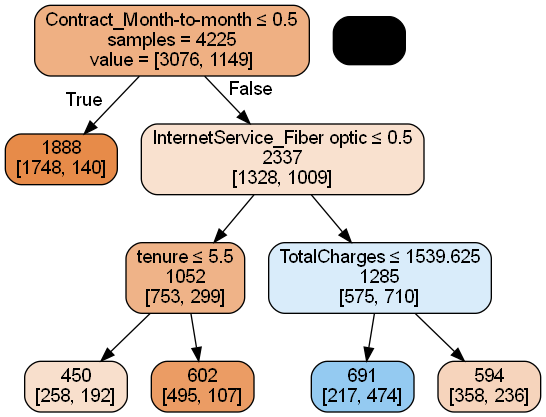

In [49]:
#Develop trees
BankClassTree1 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
BankClassTree1.fit(train_X, train_y)

plotDecisionTree(BankClassTree1, feature_names=train_X.columns)

In [50]:
classificationSummary(train_y, BankClassTree1.predict(train_X))

Confusion Matrix (Accuracy 0.7889)

       Prediction
Actual    0    1
     0 2859  217
     1  675  474


In [51]:
classificationSummary(valid_y, BankClassTree1.predict(valid_X))

Confusion Matrix (Accuracy 0.7945)

       Prediction
Actual    0    1
     0 1953  145
     1  434  286


Small Classification Tree with Control Parameters


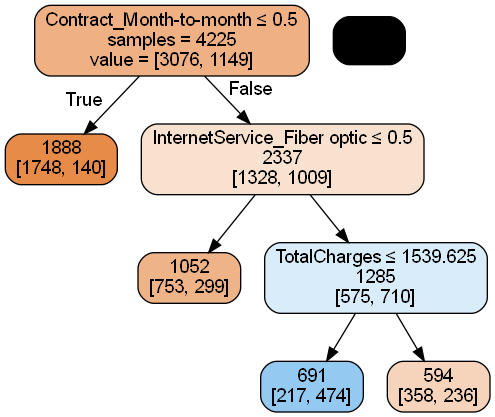

In [52]:
# Create a smaller classification tree for training partition using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 30;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [53]:
#Use ClassificationSummary for the small tree
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7945)

       Prediction
Actual    0    1
     0 1953  145
     1  434  286


## Grid Search

In [54]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
} #4*5*5 = 100 different combinations
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.7886390532544378
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [55]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 31)), 
    'min_samples_split': list(range(10, 110)), 
    'min_impurity_decrease': [0, 0.01,.005,0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.7888757396449704
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.0011, 'min_samples_split': 10}


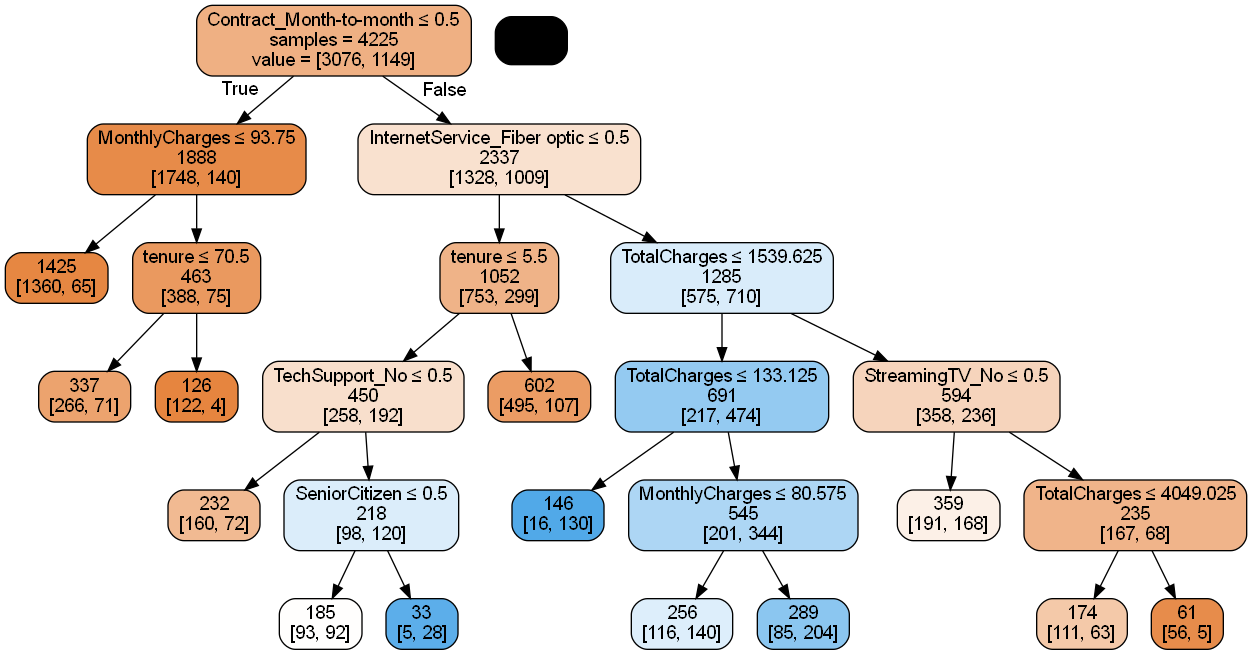

In [56]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [57]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7943)

       Prediction
Actual    0    1
     0 2854  222
     1  647  502
Confusion Matrix (Accuracy 0.7952)

       Prediction
Actual    0    1
     0 1945  153
     1  424  296


### Random Forest

In [58]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [59]:


importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)



                                    feature  importance       std
17                       InternetService_No    0.001701  0.006723
25     DeviceProtection_No internet service    0.001814  0.007722
19       OnlineSecurity_No internet service    0.001844  0.007865
22         OnlineBackup_No internet service    0.002199  0.008802
34      StreamingMovies_No internet service    0.002323  0.008487
31          StreamingTV_No internet service    0.002548  0.008831
28          TechSupport_No internet service    0.002721  0.009978
11                         PhoneService_Yes    0.002991  0.002098
13           MultipleLines_No phone service    0.002997  0.002028
10                          PhoneService_No    0.003039  0.002222
37                        Contract_One year    0.010658  0.010429
20                       OnlineSecurity_Yes    0.011009  0.009856
30                           StreamingTV_No    0.011660  0.003756
26                     DeviceProtection_Yes    0.011874  0.005118
32        

In [60]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.7921)

       Prediction
Actual    0    1
     0 1857  241
     1  345  375


### Boosted Trees

In [61]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [62]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.8002)

       Prediction
Actual    0    1
     0 1876  222
     1  341  379


### Logistic Regression

In [63]:
choose_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn']
#removed total charges to avoid multicollinearity

df_clean =df_Telco[choose_columns]
df_clean['Churn']=df_clean['Churn'].astype('category')

In [64]:
df_Telco['SeniorCitizen']=df_Telco['SeniorCitizen'].astype('category')

In [65]:
import statsmodels.api as sm

In [66]:
#defining y and X
y = df_clean['Churn']
X = pd.get_dummies(df_clean.drop(columns=['Churn']), drop_first=True)

#Run regression
logit_reg = sm.GLM(y, X, family=sm.families.Binomial())

#Fit and print results
results = logit_reg.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7020
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2925.5
Date:                Sun, 11 Dec 2022   Deviance:                       5851.0
Time:                        21:39:10   Pearson chi2:                 7.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2785
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Model 1 : Based on all variables

In [67]:
choose_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn']
#removed total charges to avoid multicollinearity

df_clean =df_Telco[choose_columns]
df_clean['Churn']=df_clean['Churn'].astype('category')

y = df_clean['Churn']
X = pd.get_dummies(df_clean.drop(columns=['Churn']), drop_first=True)

#splitting the data into two sets
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.4, random_state=1)

train_X = train_X.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
valid_X = valid_X.reset_index(drop=True)
valid_y = valid_y.reset_index(drop=True)

print(train_X.shape)
print(valid_X.shape)

(4225, 29)
(2818, 29)


In [68]:
import sys

In [69]:
np.set_printoptions(threshold=sys.maxsize) # for full width of output as we were not able to 
# see all the coeffients in ouput

In [70]:
# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger )
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -0.47597873211049285
         tenure  MonthlyCharges  gender_Male  SeniorCitizen_1  Partner_Yes  \
coeff -0.034903        0.004015     -0.01254         0.268556     0.012959   

       Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
coeff       -0.115747          -0.46081                       -0.015169   

       MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  \
coeff           0.252872                     0.815312             -0.0815   

       OnlineSecurity_No internet service  OnlineSecurity_Yes  \
coeff                             -0.0815           -0.369284   

       OnlineBackup_No internet service  OnlineBackup_Yes  \
coeff                           -0.0815         -0.058946   

       DeviceProtection_No internet service  DeviceProtection_Yes  \
coeff                               -0.0815             -0.080945   

       TechSupport_No internet service  TechSupport_Yes  \
coeff                          -0.0815        -0.3425

In [71]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })


In [72]:
#Use the classification summary function for validation data
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8034)

       Prediction
Actual    0    1
     0 1874  224
     1  330  390


### Model 2 : Based on selected variables on GLM and model above

In [74]:
df_Telco = pd.read_csv('Telco-Customer-Churn.csv', header = 0) #, encoding = "ISO-8859-1")
df_Telco['SeniorCitizen']=df_Telco['SeniorCitizen'].astype('category')
df_Telco['Churn']=df_Telco['Churn'].astype('category')
df_Telco['TotalCharges']=df_Telco['TotalCharges'].str.strip()
df_Telco['TotalCharges']=df_Telco['TotalCharges'].replace('',np.nan)
df_Telco['TotalCharges']=df_Telco['TotalCharges'].astype(float)
df_Telco['TotalCharges']=df_Telco['TotalCharges'].fillna(df_Telco['TotalCharges'].mean())
df_Telco['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_Telco['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_Telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [75]:
df_clean['Churn']=df_clean['Churn'].astype('category')
X = pd.get_dummies(df_clean.drop(columns=['Churn']) , drop_first=True)
y = df_clean['Churn']


In [76]:
predictors = ['SeniorCitizen_1','tenure','MonthlyCharges',
    'Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','InternetService_Fiber optic',
    'InternetService_No','DeviceProtection_Yes','StreamingTV_Yes',
    'StreamingMovies_Yes','Contract_One year','Contract_Two year',
    'PaperlessBilling_Yes','PaymentMethod_Electronic check']
X = X[predictors]
y = df_clean['Churn']


In [77]:
#splitting the data into two sets
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.4, random_state=1)

train_X = train_X.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
valid_X = valid_X.reset_index(drop=True)
valid_y = valid_y.reset_index(drop=True)

print(train_X.shape)
print(valid_X.shape)

(4225, 15)
(2818, 15)


In [78]:
# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger )
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space


intercept  0.7386787384193308
       SeniorCitizen_1    tenure  MonthlyCharges  Dependents_Yes  \
coeff         0.283363 -0.034051       -0.045197       -0.105718   

       PhoneService_Yes  MultipleLines_Yes  InternetService_Fiber optic  \
coeff          0.515964           0.505972                     2.075043   

       InternetService_No  DeviceProtection_Yes  StreamingTV_Yes  \
coeff           -1.783549              0.163737         0.771174   

       StreamingMovies_Yes  Contract_One year  Contract_Two year  \
coeff             0.696148          -0.631734          -1.358389   

       PaperlessBilling_Yes  PaymentMethod_Electronic check  
coeff              0.342499                        0.357786  



In [79]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })


In [80]:
#Use the classification summary function for validation data
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8055)

       Prediction
Actual    0    1
     0 1878  220
     1  328  392


## Gains chart and Decile-wise lift chart

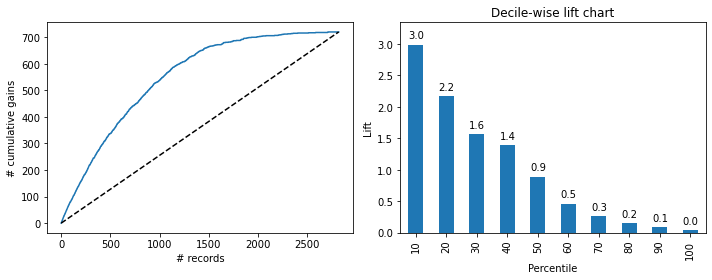

In [81]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
df['actual']=df['actual'].astype('int64')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()